### Cleaning Data and Analyzing Data before CVEC

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
nba = pd.read_csv('data/nba_important_data.csv')
nba.head()

,subreddit,selftext,title
0,nba,I haven't seen both of them play when they wer...,Why is it universally accepted that magic is b...
1,nba,All the talk is about KD and Kyrie but if thos...,Soo is anyone gonna talk about Ben?
2,nba,The Detroit Pistons might be in the unique pos...,Theory on the KD Sweepstakes
3,nba,Obviously the Lakers are and will try to make ...,No matter what the Lakers try to do for LeBron...
4,nba,NBA players have too much power in terms of te...,Adam silver is the worst commissioner in sports


In [3]:
nfl = pd.read_csv('data/nfl_important_data.csv')
nfl.head()

,subreddit,selftext,title
0,nfl,NaN,[Highlight] 49ers DB Dre Bly intercepts Matt R...
1,nfl,NaN,Colin Kaepernick Had 'One Of The Worst Workout...
2,nfl,[removed],Which duo would you rather have in their prime...
3,nfl,NaN,[Highlight] Tomorrow is Chad Pennington's Birt...
4,nfl,NaN,[Highlight] Tomorrow is Chad Pennington’s birt...


When looking at the data the football posts do not have many posts with selftext. For this reason I will be using titles for my X. When creating my new dataframe and model.

In [4]:
nba = nba.drop(columns = 'selftext')
nba.head()

,subreddit,title
0,nba,Why is it universally accepted that magic is b...
1,nba,Soo is anyone gonna talk about Ben?
2,nba,Theory on the KD Sweepstakes
3,nba,No matter what the Lakers try to do for LeBron...
4,nba,Adam silver is the worst commissioner in sports


In [5]:
nfl = nfl.drop(columns = 'selftext')
nfl.head()

,subreddit,title
0,nfl,[Highlight] 49ers DB Dre Bly intercepts Matt R...
1,nfl,Colin Kaepernick Had 'One Of The Worst Workout...
2,nfl,Which duo would you rather have in their prime...
3,nfl,[Highlight] Tomorrow is Chad Pennington's Birt...
4,nfl,[Highlight] Tomorrow is Chad Pennington’s birt...


In [6]:
nba.isnull().sum()

subreddit    0
title        0
dtype: int64

In [7]:
nfl.isnull().sum()

subreddit    0
title        0
dtype: int64

No null values present in the two dataframes that will be combined to create dataframe used for modelling.

In [8]:
concat_list = [nba,nfl]
nba_nfl = pd.concat(concat_list)
nba_nfl.head()

,subreddit,title
0,nba,Why is it universally accepted that magic is b...
1,nba,Soo is anyone gonna talk about Ben?
2,nba,Theory on the KD Sweepstakes
3,nba,No matter what the Lakers try to do for LeBron...
4,nba,Adam silver is the worst commissioner in sports


In [9]:
nba_nfl.shape

(2000, 2)

Shows that dataframes were concatanated correctly.

In [10]:
nba_nfl.to_csv('data/nba_nfl_modelling_data.csv',index=False)

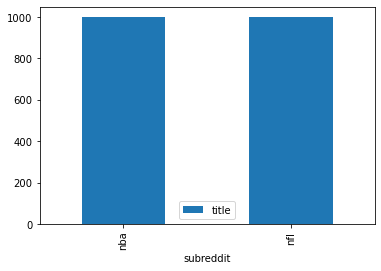

In [14]:
nba_nfl.groupby(['subreddit']).count().plot(kind='bar');

The amount of posts for both subreddits are equal at 1000 each.

In [29]:
nba_nfl1 = pd.concat(concat_list)
listss = []
for x in list(nba_nfl1['title']):
    a = x.split()
    listss.append(len(a))
nba_nfl1['subreddit_word_count'] = listss
nba_nfl1.head()

,subreddit,title,subreddit_word_count
0,nba,Why is it universally accepted that magic is b...,11
1,nba,Soo is anyone gonna talk about Ben?,7
2,nba,Theory on the KD Sweepstakes,5
3,nba,No matter what the Lakers try to do for LeBron...,17
4,nba,Adam silver is the worst commissioner in sports,8


In [30]:
nba_nfl1.groupby(['subreddit'])['subreddit_word_count'].mean()

subreddit
nba    14.614
nfl    17.115
Name: subreddit_word_count, dtype: float64

nfl has an average word count that is 2.5 words larger than nba.